# Importing Dependencies 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

# Reading Dataset

In [ ]:
df= pd.read_csv("/content/drive/MyDrive/2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv")

# Exploring dataframe (Question1)
* Think about what could be going wrong with our calculation. Think about a 
better way to evaluate this data.

Because our AOV is particularly high, we're going to investigate our order values in each shop. Calculating order amount / total item generates a new column (rev_per_item). Then we plot the sorted values of this column to see if the avarage value is abnormal. We learned from this plot that there is only one shop in this dataset with an unusual order value.

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,rev_per_item
245,246,92,890,360,4,cash,2017-03-18 17:42:29,90.0
2474,2475,2,893,282,3,debit,2017-03-21 12:25:26,94.0
3180,3181,32,809,101,1,cash,2017-03-10 14:01:52,101.0
846,847,100,745,111,1,credit_card,2017-03-12 3:46:08,111.0
4173,4174,53,922,336,3,credit_card,2017-03-30 5:56:44,112.0
...,...,...,...,...,...,...,...,...
977,978,99,870,390,2,credit_card,2017-03-26 6:01:36,195.0
2091,2092,89,940,392,2,cash,2017-03-02 4:17:44,196.0
4994,4995,12,954,201,1,cash,2017-03-22 0:38:11,201.0
4056,4057,42,607,704000,2000,credit_card,2017-03-28 4:00:00,352.0


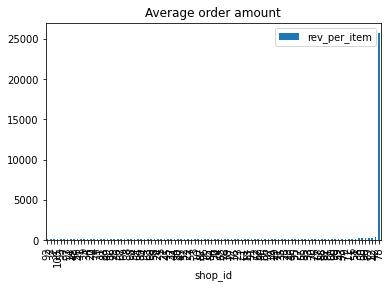

In [ ]:
df["rev_per_item"]= df["order_amount"]/df["total_items"]
df.sort_values(by=["rev_per_item"], inplace=True)
df.drop_duplicates(subset =["shop_id"], inplace = True)
df.plot.bar(x="shop_id", y="rev_per_item", title="Average order amount")
df

We are going to break our plot into two different plots with a threshold of 5000 revenue value because the previous plot does not offer a lot of information about our values distribution.

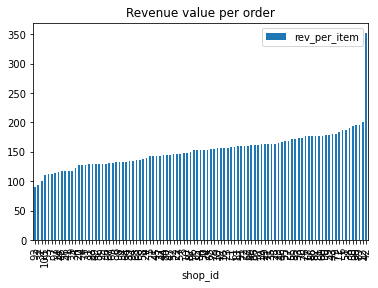

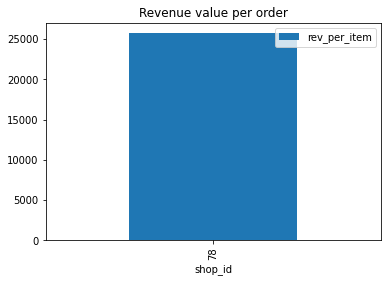

In [ ]:
df_valids = df[df["rev_per_item"]<5000]
fig1 = df_valids.plot.bar(x="shop_id", y="rev_per_item", title="Revenue value per order")
fig = fig1.get_figure()
fig.savefig("output1.png")
df_invalids = df[df["rev_per_item"]>=5000]
fig2 = df_invalids.plot.bar(x="shop_id", y="rev_per_item", title="Revenue value per order")
fig = fig2.get_figure()
fig.savefig("output2.png")

# Question 2 and 3
* What metric would you report for this dataset?
* What is its value?


Because the average measure is so sensitive to dataset noise, the median metric is an excellent solution for our problem. The median of revenue value per order in this situation is 153.

In [ ]:
df["rev_per_item"].median()

153.0